In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [48]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df.shape

(10000, 14)

In [50]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [53]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [54]:
for col in df.columns:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print()

Value counts for column 'RowNumber':
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'CustomerId':
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64

Value counts for column 'Surname':
Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

Value counts for column 'CreditScore':
CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

Value counts for column 'Geography':
Geography
France     5014
Germany    2509
Spain

### **Finding which columns has outliers**

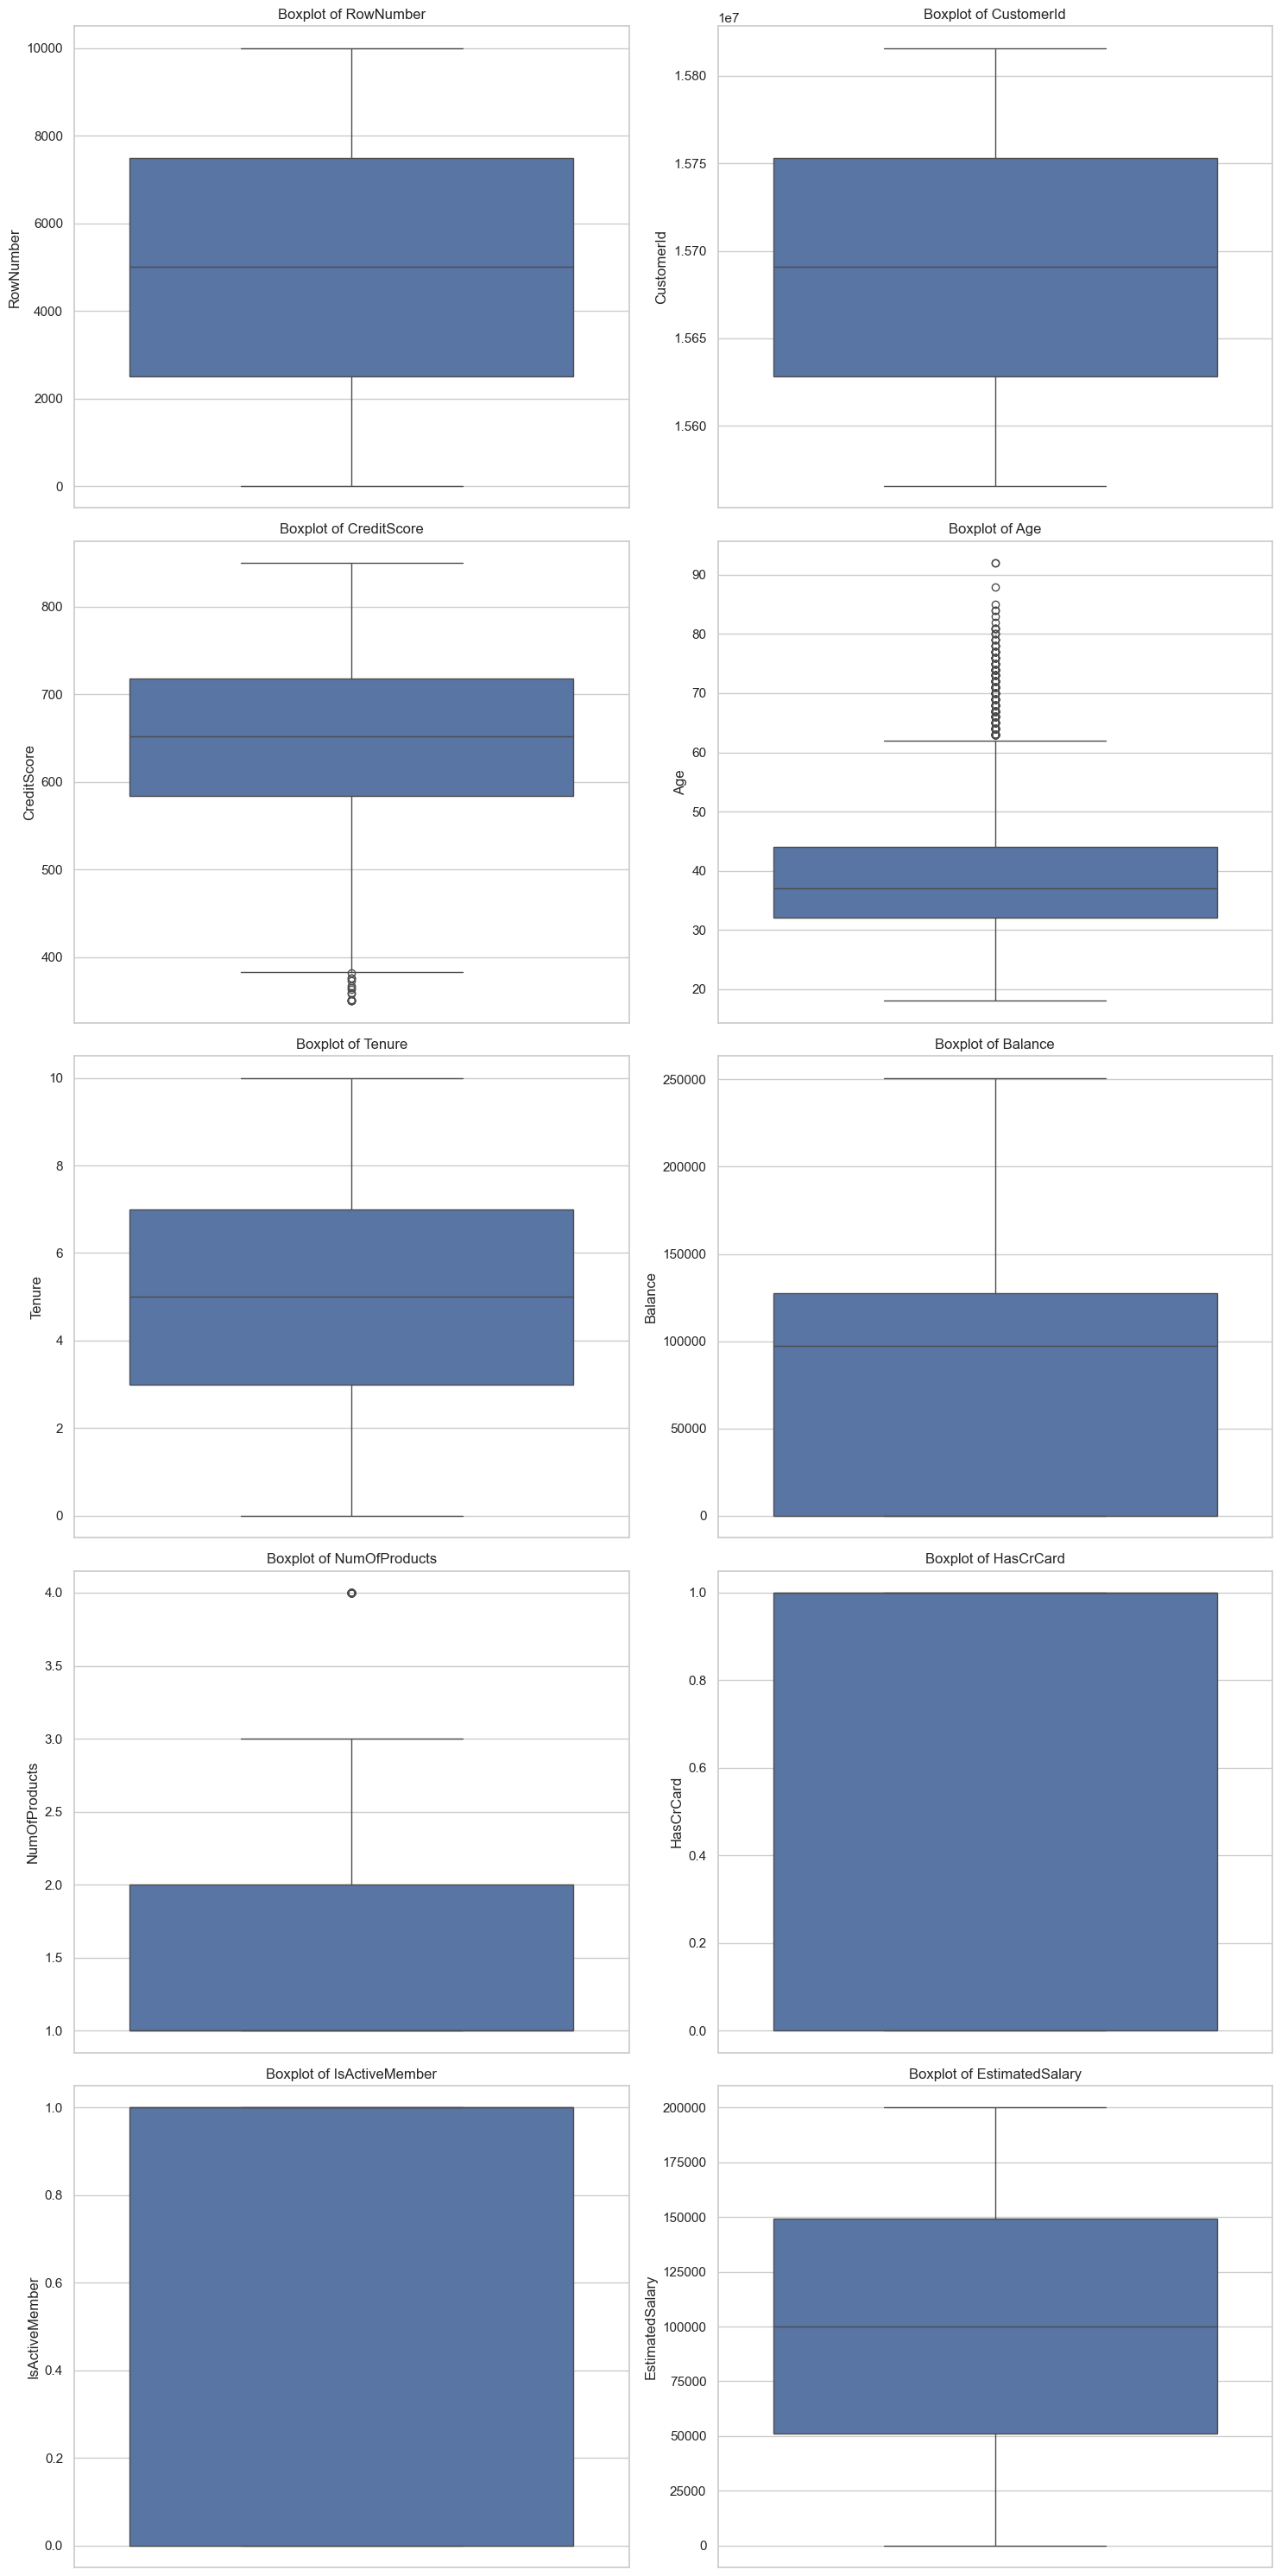

In [55]:
sns.set_theme(style="whitegrid")

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('Exited')

fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Handling Outliers by Capping it with IQR Method**

In [56]:
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = np.delete(numeric_columns, np.where(numeric_columns == 'Exited'))

outlier_columns = []
for col in numeric_columns:
    capped_column = cap_outliers_iqr(df[col])
    if not capped_column.equals(df[col]):
        outlier_columns.append(col)
    df[col] = capped_column

### **Checking Columns after Handling Outliers**

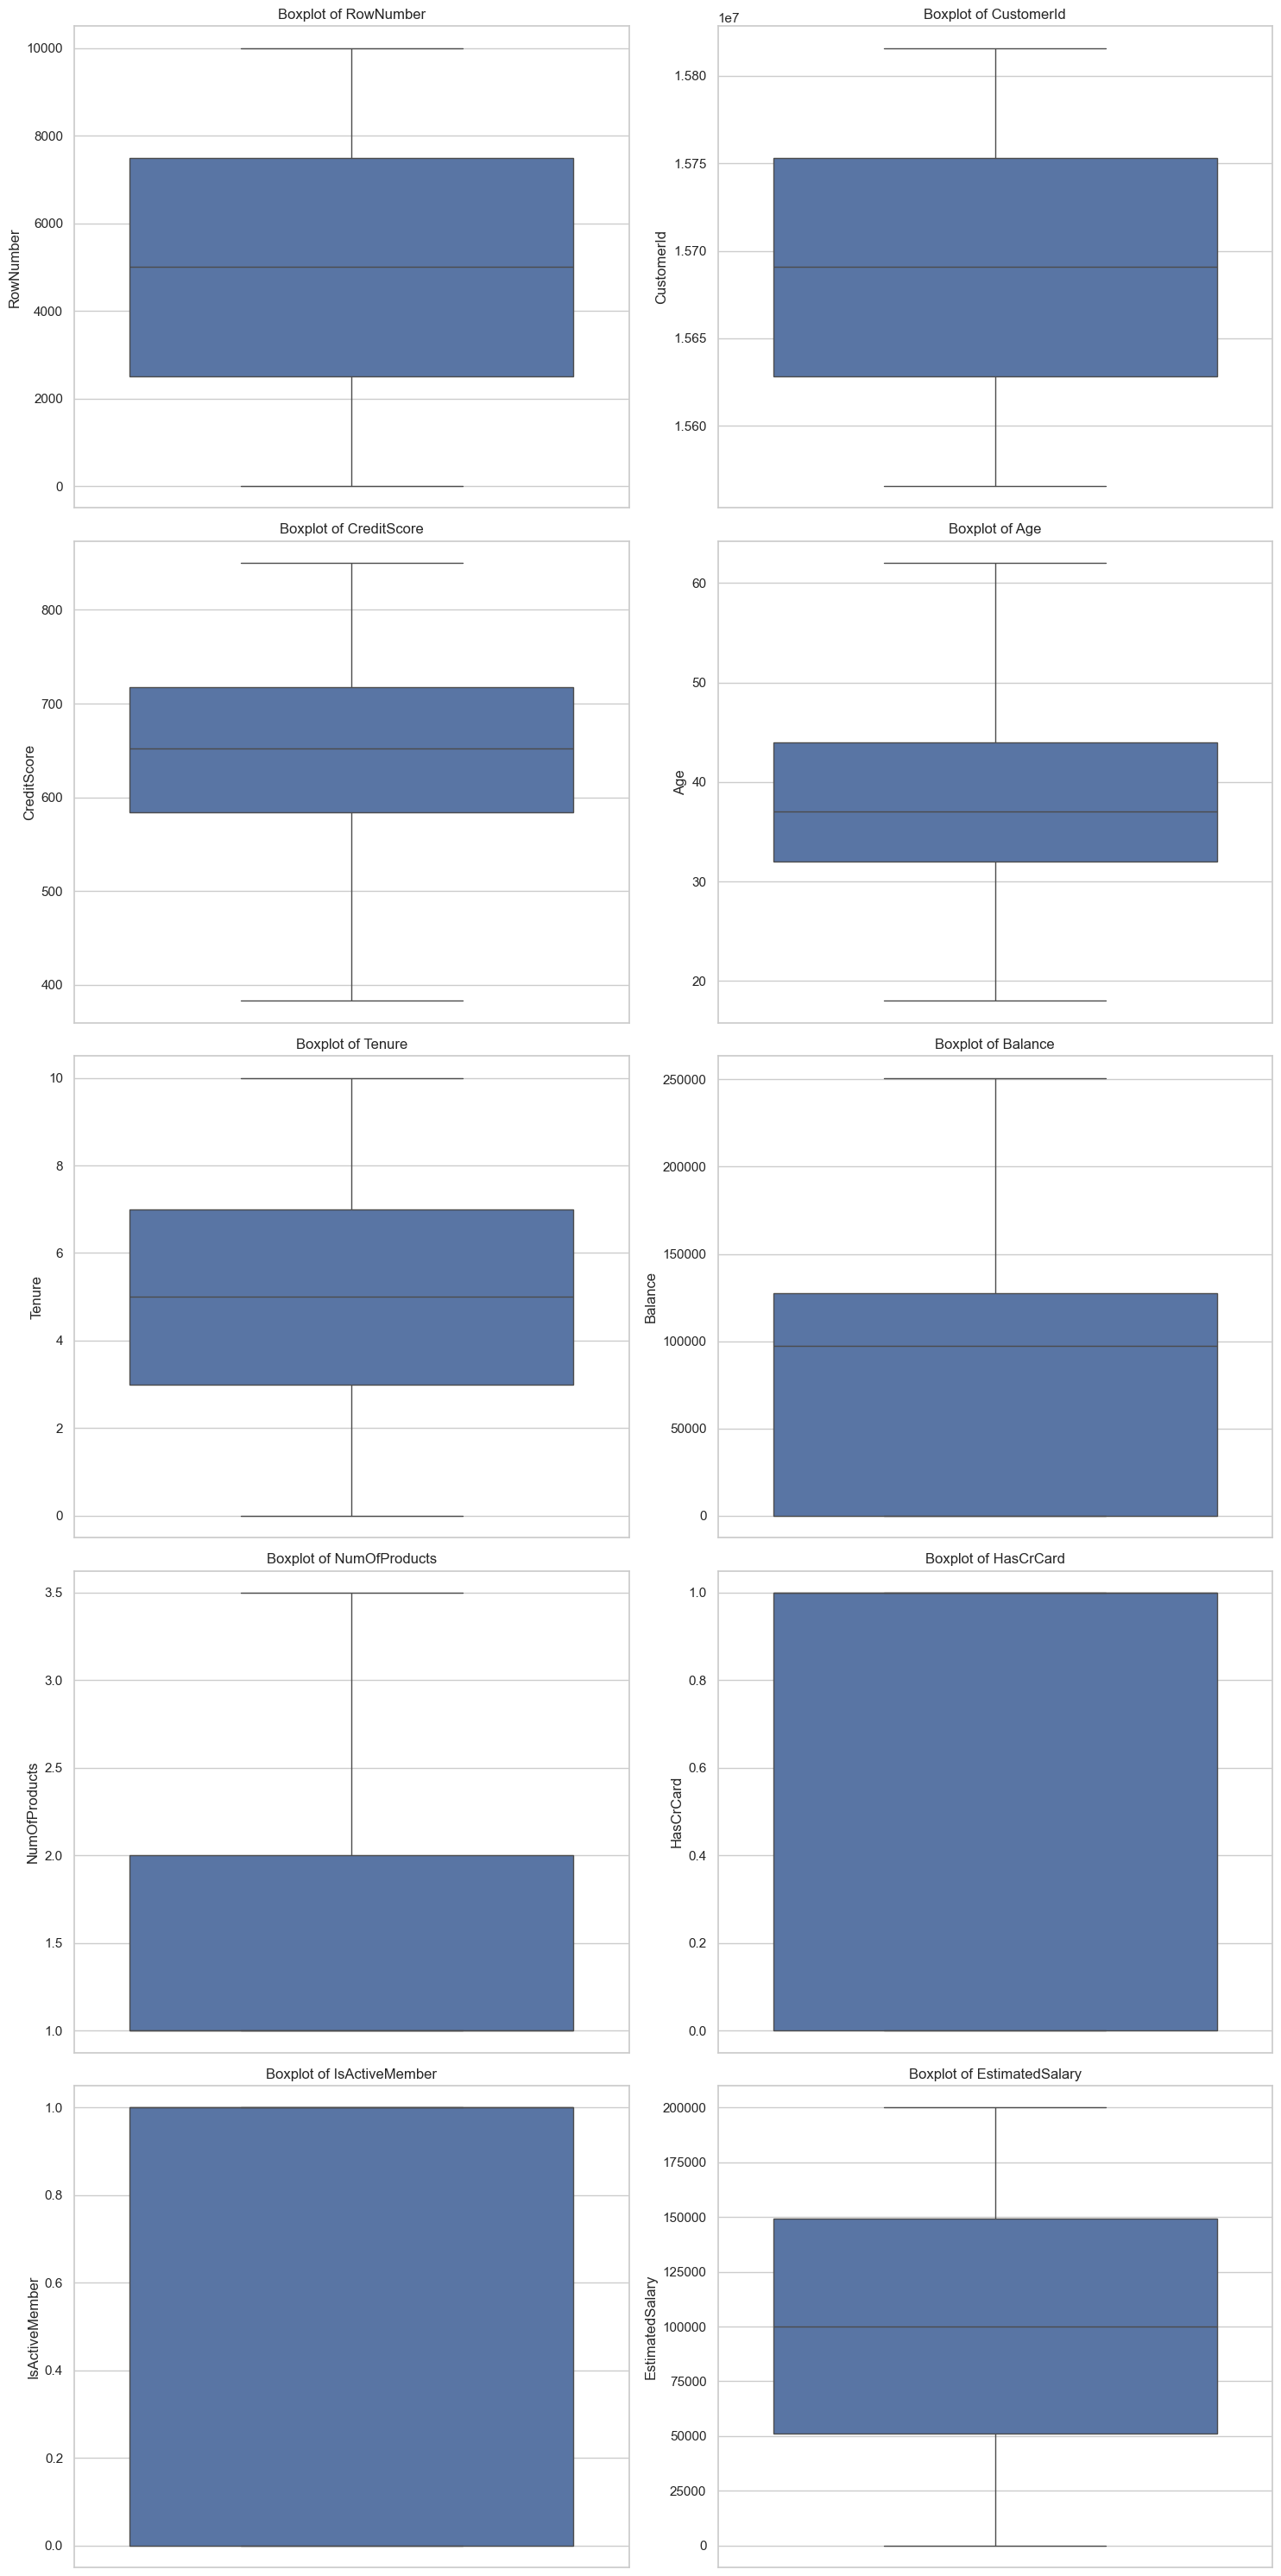

In [57]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [61]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1,40-50
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0,40-50
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1,40-50
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0,40-50


In [62]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

churn_by_age_group = df.groupby('AgeGroup', observed=True)['Exited'].mean().reset_index()
churn_by_geography = df.groupby('Geography', observed=True)['Exited'].mean().reset_index()
churn_by_gender = df.groupby('Gender', observed=True)['Exited'].mean().reset_index()
churn_by_products = df.groupby('NumOfProducts', observed=True)['Exited'].mean().reset_index()



In [63]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup
0,619.0,France,Female,42.0,2,0.00,1.0,1,1,101348.88,1,40-50
1,608.0,Spain,Female,41.0,1,83807.86,1.0,0,1,112542.58,0,40-50
2,502.0,France,Female,42.0,8,159660.80,3.0,1,0,113931.57,1,40-50
3,699.0,France,Female,39.0,1,0.00,2.0,0,0,93826.63,0,30-40
4,850.0,Spain,Female,43.0,2,125510.82,1.0,1,1,79084.10,0,40-50


In [64]:
df.to_csv('cleansed_data.csv', index=False)

In [65]:
df.shape

(10000, 12)